In [2]:
import os
import pandas as pd

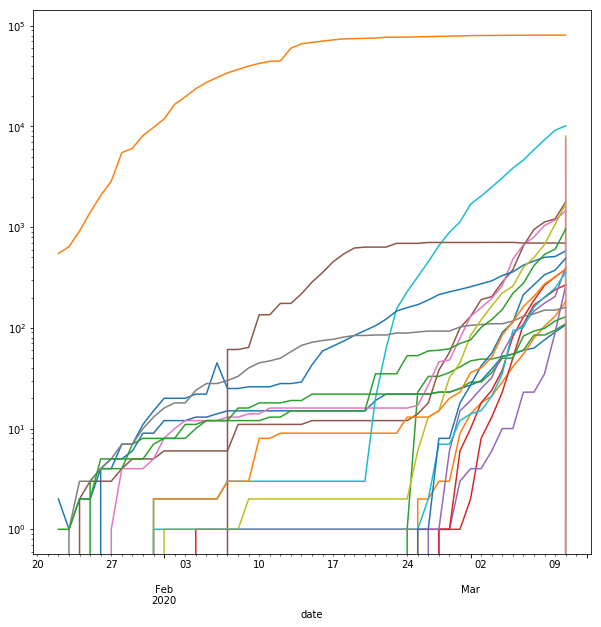

In [15]:
# Load Data
datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
    
df = pd.read_csv(datapath)
del df['Lat']
del df['Long']
df=df.groupby('Country/Region').sum()
last_date = list(df.columns)[-1]
df = df[df[last_date]>100]
df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

del df.index.name
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)



%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

ax=df.plot(logy=True, legend=False) #list(df.columns))


In [17]:
# Shift all the series
df.columns = [c[1] for c in df.columns]

del df['Others']

for c in df.columns:
    for i,a in enumerate(df[c]):        
        if a>=100:
            df[c]=df[c].shift(-i)            
            break


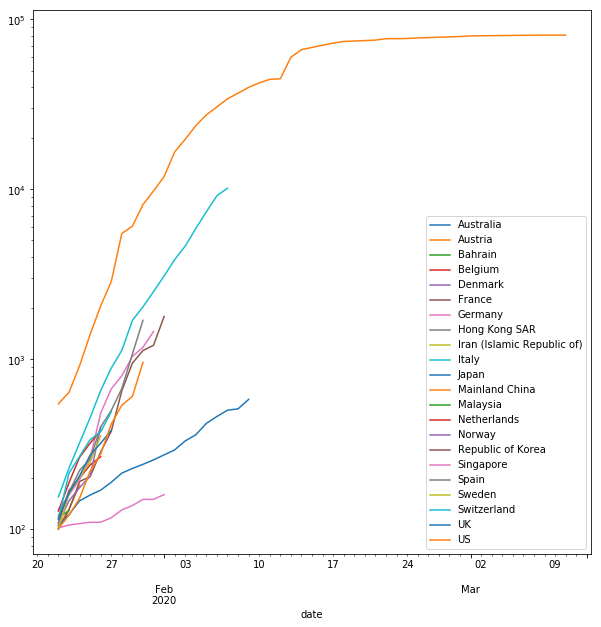

In [18]:

fig, ax = plt.subplots()
df.plot(logy=True, ax=ax) #, ax=ax)
#df